# Deep Learning Lab - Exercise 0
**Student: Marusic Diana, matriculation nr 314017**

# Load pacakages
For our exercises, you should always use the standar packages from Google Colab unless stated otherwise.

Tensorflow 2.9.2

Numpy 1.21.6

Panda 1.3.5

----

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
from google.colab import drive

print(tf.__version__)
print(np.__version__)
print(pd.__version__)

2.9.2
1.21.6
1.3.5


# Load data function vs Data Generator
Example for loading data by generating sinwave data

In [ ]:
def loadData():
  x = np.random.rand(16000,1)*2*np.pi-np.pi 
  y = np.sin(x)
  return x , y

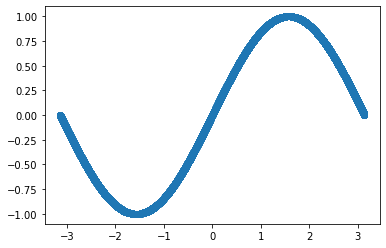

In [ ]:
x,y = loadData()
plt.scatter(x,y)

# Structure your model
Create a class to define and use your model

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

# Implementation of simple feedforward network
class FCNet(Model):
  def __init__(self, neurons=[12,12,3], reg=None,activation="relu"):
    super(FCNet, self).__init__()

    self.denseLayers=[]
    for idx,neuron in enumerate(neurons):
      self.denseLayers.append(Dense(neuron, activation="relu"))

    self.outputLayer = Dense(1, activation=None)

  def call(self, input_x):
    output = input_x

    for layer in self.denseLayers:
      output = layer(output)

    return self.outputLayer(output)

# Create an optimization routine
Define your optimization steps

In [ ]:
class TrainModel:

  def __init__(self, model, batch_size = 8, lr = 0.001, loss = tf.keras.losses.MeanSquaredError, opt=tf.keras.optimizers.Adam):

    self.model      = model
    self.loss       = loss()
    self.optimizer  = opt(learning_rate = lr)
    self.batch_size = batch_size

    self.train_loss     = tf.keras.metrics.Mean(name='train_loss')

    self.test_loss     = tf.keras.metrics.Mean(name='test_loss')

  
  @tf.function
  def train_step(self, x , y):
    with tf.GradientTape() as tape:
      predictions = self.model(x)
      loss = self.loss(y, predictions)

    gradients = tape.gradient(loss, self.model.trainable_variables)
    self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
    self.train_loss.update_state(loss)
    return loss

  @tf.function
  def test_step(self, x , y):
    predictions = self.model(x)
    loss = self.loss(y, predictions)
    self.test_loss.update_state(loss)
    return loss

  def train(self):
    loss = []
    for bX, bY in self.train_ds:
      loss.append(self.train_step(bX, bY))
    return loss
  
  def test(self):
    loss = []
    for bX, bY in self.test_ds:
      loss.append(self.test_step(bX, bY))  
    return loss 
  
  def run(self, dataX, dataY, testX, testY, epochs, verbose=2):
    history = []
    
    # other idea: tf.data.Dataset.from_generator() ....
    # also idea: can extend the provided class through inheritance & then just override the run method
    self.train_ds = tf.data.Dataset.from_tensor_slices((dataX, dataY)).shuffle(16000).batch(self.batch_size)
    self.test_ds  = tf.data.Dataset.from_tensor_slices((testX,testY)).batch(self.batch_size)
    
    ###
    print("train_ds shape:", len(list(self.train_ds)))
    ###
    for i in range(epochs):
      
      train_loss = self.train()
      test_loss  = self.test()

      history.append([train_loss,test_loss])

      if verbose > 0 and (i==0 or (i+1)%5==0):
        print(f"epoch: {i+1}, TRAIN LOSS: {self.train_loss.result()},TEST LOSS: {self.test_loss.result()}")
        
        self.train_loss.reset_states()
        self.test_loss.reset_states()

    return history

# Structure your calls
Here you should make the main calls

In [ ]:
x_train, y_train = loadData()
x_test, y_test  = loadData()

model  = FCNet()
opt    = TrainModel(model, batch_size = 8, lr = 0.001, loss = tf.keras.losses.MeanSquaredError, opt=tf.keras.optimizers.SGD)

hist = opt.run(x_train, y_train, x_test, y_test, epochs=20, verbose=1)
hist = np.array(hist)

train_ds shape: 2000
epoch: 1, TRAIN LOSS: 0.2773926258087158,TEST LOSS: 0.21036888659000397
epoch: 5, TRAIN LOSS: 0.12046206742525101,TEST LOSS: 0.0999024510383606
epoch: 10, TRAIN LOSS: 0.03228176385164261,TEST LOSS: 0.028258565813302994
epoch: 15, TRAIN LOSS: 0.012412535957992077,TEST LOSS: 0.011255141347646713
epoch: 20, TRAIN LOSS: 0.006134255789220333,TEST LOSS: 0.005671544931828976


# PLOT

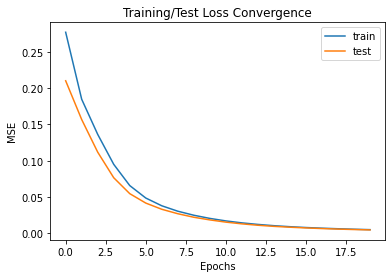

In [ ]:
plt.plot(np.mean(hist,-1)[:,0],label="train")
plt.plot(np.mean(hist,-1)[:,1],label="test")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training/Test Loss Convergence")
plt.legend()

# EXERCISE 1

## Make the following updates to the code. Make sure to comment your code. No comments / insufficient comments will lead to point deduction.

### a) Update the run() function in RunModel such that it works with a generator object instead of a data array. For this use the function genData() instead of using loadData() and run the following code.

In [ ]:
# defining the RunModel class, which will use the generator:
class RunModel:

  def __init__(self, model, batch_size = 8, lr = 0.001, loss = tf.keras.losses.MeanSquaredError, opt=tf.keras.optimizers.Adam):

    self.model      = model
    self.loss       = loss()
    self.optimizer  = opt(learning_rate = lr)
    self.batch_size = batch_size

    self.train_loss     = tf.keras.metrics.Mean(name='train_loss')

    self.test_loss     = tf.keras.metrics.Mean(name='test_loss')

  
  @tf.function
  def train_step(self, x , y):
    with tf.GradientTape() as tape:
      predictions = self.model(x)
      loss = self.loss(y, predictions)

    gradients = tape.gradient(loss, self.model.trainable_variables)
    self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
    self.train_loss.update_state(loss)
    return loss

  @tf.function
  def test_step(self, x , y):
    predictions = self.model(x)
    loss = self.loss(y, predictions)
    self.test_loss.update_state(loss)
    return loss

  def train(self):
    loss = []
    for bX, bY in self.train_ds:
      loss.append(self.train_step(bX, bY))
    return loss
  
  def test(self):
    loss = []
    for bX, bY in self.test_ds:
      loss.append(self.test_step(bX, bY))  
    return loss 
  
  def run(self, train_gen, test_gen, epochs, verbose=2):
    history = []
    
    # calling next on the generator to get the random next item and get X, Y data for train and test:
  
    
    self.train_ds = []
    self.test_ds = []

    # dividing 16000 by the batch size, because we already generate data in batches of batch_size
    # 16000 is chosen because in the previous code, the full dataset size was 16000
    for i in range(16000 // self.batch_size):
      dataX, dataY = next(train_gen)
      testX, testY = next(test_gen)
      self.train_ds.append((dataX, dataY))
      self.test_ds.append((testX, testY))
    
    # self.train_ds = tf.data.Dataset.from_tensor_slices((dataX, dataY)).shuffle(16000).batch(self.batch_size)
    # self.test_ds  = tf.data.Dataset.from_tensor_slices((testX,testY)).batch(self.batch_size)
    ###########################

    for i in range(epochs):
      
      train_loss = self.train()
      test_loss  = self.test()

      history.append([train_loss,test_loss])

      if verbose > 0 and (i==0 or (i+1)%5==0):
        print(f"epoch: {i+1}, TRAIN LOSS: {self.train_loss.result()},TEST LOSS: {self.test_loss.result()}")
        

        self.train_loss.reset_states()
        self.test_loss.reset_states()

    return history

In [ ]:
def genData(batch_size=100):
  while True:
    x = np.random.rand(batch_size,1)*2*np.pi-np.pi 
    y = np.sin(x)
    yield x , y

train_gen = genData(batch_size=8)
test_gen  = genData(batch_size=8)

In [ ]:
model  = FCNet()
# using the defined RunModel class, which works with the generators:
opt    = RunModel(model, lr = 0.001, loss = tf.keras.losses.MeanSquaredError, opt=tf.keras.optimizers.SGD)

# keeping the same nr of epochs (20) as in the previous experiment:
hist = opt.run(train_gen, test_gen, 20, verbose=1)

epoch: 1, TRAIN LOSS: 0.21579472720623016,TEST LOSS: 0.12246962636709213
epoch: 5, TRAIN LOSS: 0.06811230629682541,TEST LOSS: 0.05732003226876259
epoch: 10, TRAIN LOSS: 0.011290616355836391,TEST LOSS: 0.009059393778443336
epoch: 15, TRAIN LOSS: 0.001833143993280828,TEST LOSS: 0.0016226439038291574
epoch: 20, TRAIN LOSS: 0.0008038487285375595,TEST LOSS: 0.0007390675018541515


Plotting the Training/Test Loss Convergence again:

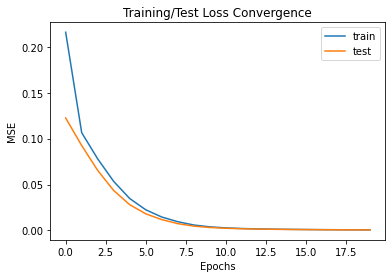

In [ ]:
plt.plot(np.mean(hist,-1)[:,0],label="train")
plt.plot(np.mean(hist,-1)[:,1],label="test")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training/Test Loss Convergence")
plt.legend()

### b) Add L2 regularization and gradient clipping by norm to the model. Test your implementations by running the original code and the updated one by training on xn_train, yn_train which contains outliers. Observe results. 

Formula for the l2 regularization:

$L(x, y) = \sum_{i=1}^{n} (y_i - h_{\theta}(x_i))^2 + \lambda \sum_{i=1}^{n} \theta_i^2$

Formula used for the gradient clipping by norm:

$clip(g, threshold) = g \cdot max(1, \frac{threshold}{||g||})$

In [ ]:
# the updated TrainModel class, with l2 regularization and gradient clipping added:
class TrainModelUpdated:

  def __init__(self, model, batch_size = 8, lr = 0.001, loss = tf.keras.losses.MeanSquaredError, opt=tf.keras.optimizers.Adam, 
               use_l2_reg=False, use_clipnorm=False, reg_weig_lambda=0.001):

    self.model      = model
    self.loss       = loss()
    self.use_l2_reg = use_l2_reg
    self.reg_weig_lambda = reg_weig_lambda
  
    
    #### Gradient clipping helps to avoid exploding gradients:    
    # Setting the clipnorm parameter to 0.2, which means that in case the 
    # gradient vector norm will exceed 0.2, the values in the vector will 
    #be rescaled such that the norm will be 0.2
    if use_clipnorm:
      self.optimizer  = opt(learning_rate = lr, clipnorm=0.2)
    ##########
    else:
      self.optimizer  = opt(learning_rate = lr)


    self.batch_size = batch_size

    self.train_loss     = tf.keras.metrics.Mean(name='train_loss')
    self.test_loss     = tf.keras.metrics.Mean(name='test_loss')
  
  #??? possibly need to add @tf.function to add it to the tf graph???
  def apply_loss_with_l2(self, targets, predictions, llambda=0.002):
    """ computes the loss with the l2 regularization """
    weights   = self.model.trainable_variables
    # add_n will add all the input tensors element-wise.
    # l2_loss will compute the l2 norm of a vector: https://www.tensorflow.org/api_docs/python/tf/nn/l2_loss
    l2_regularization = tf.add_n([ tf.nn.l2_loss(var) for var in weights ]) * llambda
    initial_loss = self.loss(targets, predictions)
    return initial_loss + llambda * l2_regularization

  
  @tf.function
  def train_step(self, x , y):
    with tf.GradientTape() as tape:
      predictions = self.model(x)
      if self.use_l2_reg:
        loss = self.apply_loss_with_l2(y, predictions, self.reg_weig_lambda)
      else:
        loss = self.loss(y, predictions)

    gradients = tape.gradient(loss, self.model.trainable_variables)
    self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
    self.train_loss.update_state(loss)
    return loss

  @tf.function
  def test_step(self, x , y):
    predictions = self.model(x)
    if self.use_l2_reg:
        loss = self.apply_loss_with_l2(y, predictions, self.reg_weig_lambda)
    else:
        loss = self.loss(y, predictions)

    self.test_loss.update_state(loss)
    return loss

  def train(self):
    loss = []
    for bX, bY in self.train_ds:
      loss.append(self.train_step(bX, bY))
    return loss
  
  def test(self):
    loss = []
    for bX, bY in self.test_ds:
      loss.append(self.test_step(bX, bY))  
    return loss 
  
  def run(self, dataX, dataY, testX, testY, epochs, verbose=2):
    history = []
    
    self.train_ds = tf.data.Dataset.from_tensor_slices((dataX, dataY)).shuffle(16000).batch(self.batch_size)
    self.test_ds  = tf.data.Dataset.from_tensor_slices((testX,testY)).batch(self.batch_size)
    
    for i in range(epochs):
      
      train_loss = self.train()
      test_loss  = self.test()

      history.append([train_loss,test_loss])

      if verbose > 0 and (i==0 or (i+1)%5==0):
        print(f"epoch: {i+1}, TRAIN LOSS: {self.train_loss.result()},TEST LOSS: {self.test_loss.result()}")
        
        self.train_loss.reset_states()
        self.test_loss.reset_states()

    return history

In [ ]:
def loadOutlierData():
 
  x = np.random.rand(16000,1)*2*np.pi-np.pi 
  y = np.sin(x)
  
  # Addings outliers
  y[np.random.randint(0,16000,3)]=1000.

  return x , y


xn_train, yn_train = loadOutlierData()
x_test, y_test   = loadData()

### Running first on the initial model:

In [ ]:
model = FCNet()
x_train, y_train = loadOutlierData()
x_test, y_test   = loadData()

opt    = TrainModel(model, batch_size = 8, lr = 0.001, loss = tf.keras.losses.MeanSquaredError, opt=tf.keras.optimizers.Adam)

hist = opt.run(x_train, y_train, x_test, y_test, 20, verbose=1)

train_ds shape: 2000
epoch: 1, TRAIN LOSS: 187.5404510498047,TEST LOSS: 0.0886751264333725
epoch: 5, TRAIN LOSS: 187.34259033203125,TEST LOSS: 0.0462062731385231
epoch: 10, TRAIN LOSS: 187.24803161621094,TEST LOSS: 0.04830154776573181
epoch: 15, TRAIN LOSS: 187.2230987548828,TEST LOSS: 0.06567418575286865
epoch: 20, TRAIN LOSS: 187.21090698242188,TEST LOSS: 0.08350788056850433


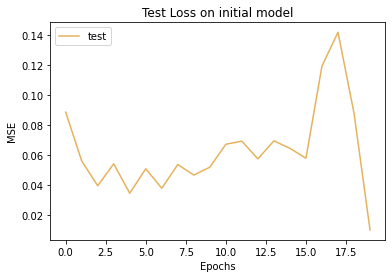

In [ ]:
plt.plot(np.mean(hist,-1)[:,1],label="test", color="#E5B25D")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Test Loss on initial model")
plt.legend()

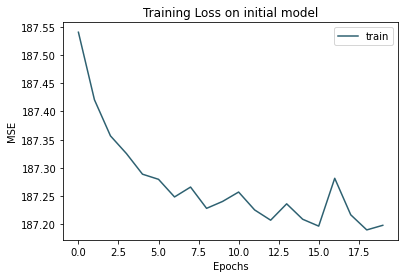

In [ ]:
plt.plot(np.mean(hist,-1)[:,0],label="train", color="#2E6171")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training Loss on initial model")
plt.legend()

### Running on the updated model with only l2 regularization:

In [ ]:
model = FCNet()
x_train, y_train = loadOutlierData()
x_test, y_test   = loadData()

opt    = TrainModelUpdated(model, batch_size = 8, lr = 0.001, 
                           loss = tf.keras.losses.MeanSquaredError, 
                           opt=tf.keras.optimizers.Adam,
                             use_l2_reg=True, use_clipnorm=False, reg_weig_lambda=0.3)

hist = opt.run(x_train, y_train, x_test, y_test, 30, verbose=1)

epoch: 1, TRAIN LOSS: 188.0290069580078,TEST LOSS: 0.4118349254131317
epoch: 5, TRAIN LOSS: 187.85479736328125,TEST LOSS: 0.3425084054470062
epoch: 10, TRAIN LOSS: 187.83108520507812,TEST LOSS: 0.32996121048927307
epoch: 15, TRAIN LOSS: 187.82359313964844,TEST LOSS: 0.37566694617271423
epoch: 20, TRAIN LOSS: 187.83839416503906,TEST LOSS: 0.3268452286720276
epoch: 25, TRAIN LOSS: 187.83251953125,TEST LOSS: 0.341612309217453
epoch: 30, TRAIN LOSS: 187.81739807128906,TEST LOSS: 0.39303919672966003


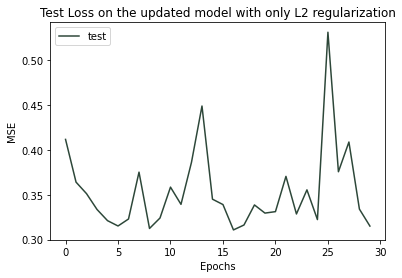

In [ ]:
plt.plot(np.mean(hist,-1)[:,1],label="test", color="#2D4739")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Test Loss on the updated model with only L2 regularization")
plt.legend()

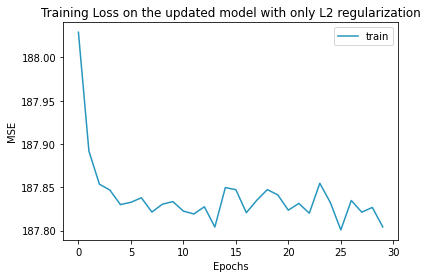

In [ ]:
plt.plot(np.mean(hist,-1)[:,0],label="train", color="#2596be")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training Loss on the updated model with only L2 regularization")
plt.legend()

### Running on the updated model with only gradient clipping:


In [ ]:
model = FCNet()
x_train, y_train = loadOutlierData()
x_test, y_test   = loadData()

opt    = TrainModelUpdated(model, batch_size = 8, lr = 0.001, 
                           loss = tf.keras.losses.MeanSquaredError, 
                           opt=tf.keras.optimizers.Adam,
                             use_l2_reg=False, use_clipnorm=True)

hist = opt.run(x_train, y_train, x_test, y_test, 30, verbose=1)

epoch: 1, TRAIN LOSS: 187.52059936523438,TEST LOSS: 0.030676834285259247
epoch: 5, TRAIN LOSS: 187.42904663085938,TEST LOSS: 0.007913126610219479
epoch: 10, TRAIN LOSS: 187.40419006347656,TEST LOSS: 0.0005349310231395066
epoch: 15, TRAIN LOSS: 187.40524291992188,TEST LOSS: 0.0002686298394110054
epoch: 20, TRAIN LOSS: 187.40635681152344,TEST LOSS: 0.0003410294884815812
epoch: 25, TRAIN LOSS: 187.40475463867188,TEST LOSS: 0.0004579111118800938
epoch: 30, TRAIN LOSS: 187.40591430664062,TEST LOSS: 8.962048013927415e-05


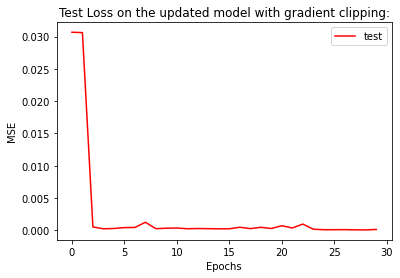

In [ ]:
plt.plot(np.mean(hist,-1)[:,1],label="test", color="red")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Test Loss on the updated model with gradient clipping:")
plt.legend()

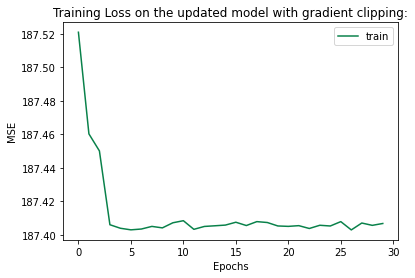

In [ ]:
plt.plot(np.mean(hist,-1)[:,0],label="train", color="#09814A")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training Loss on the updated model with gradient clipping:")
plt.legend()

### Running the updated model with both L2 regularization and gradient clipping:


In [ ]:
model = FCNet()
x_train, y_train = loadOutlierData()
x_test, y_test   = loadData()

opt    = TrainModelUpdated(model, batch_size = 8, lr = 0.001, 
                           loss = tf.keras.losses.MeanSquaredError, 
                           opt=tf.keras.optimizers.Adam,
                             use_l2_reg=True, use_clipnorm=True,
                            reg_weig_lambda=0.1)

hist = opt.run(x_train, y_train, x_test, y_test, 30, verbose=1)

epoch: 1, TRAIN LOSS: 187.81918334960938,TEST LOSS: 0.06824569404125214
epoch: 5, TRAIN LOSS: 187.76329040527344,TEST LOSS: 0.05827530845999718
epoch: 10, TRAIN LOSS: 187.7545166015625,TEST LOSS: 0.05673209950327873
epoch: 15, TRAIN LOSS: 187.7568817138672,TEST LOSS: 0.056518543511629105
epoch: 20, TRAIN LOSS: 187.75772094726562,TEST LOSS: 0.05624668672680855
epoch: 25, TRAIN LOSS: 187.75845336914062,TEST LOSS: 0.05649644881486893
epoch: 30, TRAIN LOSS: 187.75811767578125,TEST LOSS: 0.05662824213504791


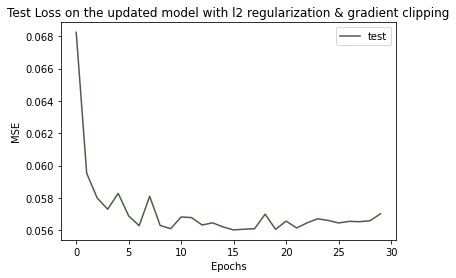

In [ ]:
plt.plot(np.mean(hist,-1)[:,1],label="test", color="#495F41")

plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Test Loss on the updated model with l2 regularization & gradient clipping")
plt.legend()

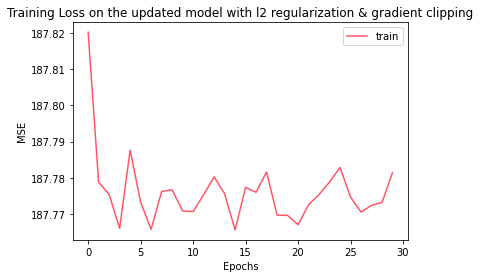

In [ ]:
plt.plot(np.mean(hist,-1)[:,0],label="train", color="#FF5666")

plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training Loss on the updated model with l2 regularization & gradient clipping")
plt.legend()


## Feel free to make changes, as long as they make the code clear and keep a similar structure

# Exercise 2:

Split your final code into these files according to their names and purpose:

- data_loading.py
- model.py
- train.py
- run.py

and make sure the cell below runs without issues (on colab). while producing a similar output.

Mounted at /content/gdrive


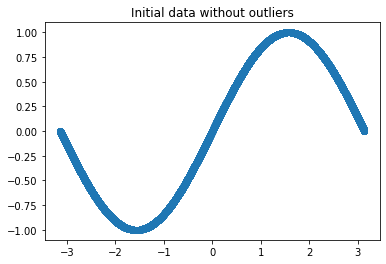

loading data with outliers....
epoch: 1, TRAIN LOSS: 187.83453369140625,TEST LOSS: 0.08765485882759094
epoch: 5, TRAIN LOSS: 187.63697814941406,TEST LOSS: 0.08050348609685898
epoch: 10, TRAIN LOSS: 187.63055419921875,TEST LOSS: 0.07766971737146378
epoch: 15, TRAIN LOSS: 187.62123107910156,TEST LOSS: 0.07506603747606277
epoch: 20, TRAIN LOSS: 187.61822509765625,TEST LOSS: 0.07442715764045715
epoch: 25, TRAIN LOSS: 187.61964416503906,TEST LOSS: 0.0735320970416069
epoch: 30, TRAIN LOSS: 187.61549377441406,TEST LOSS: 0.07276260107755661


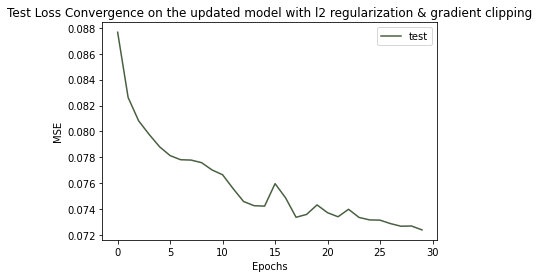

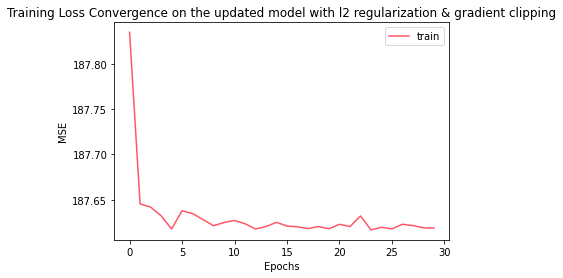

In [ ]:
from google.colab import drive
import sys
drive.mount('/content/gdrive', force_remount=True)
sys.path.append('/content/gdrive/My Drive/Univer_Hildesheim/DL_lab/') # CHANGE THIS LINE DEPENDING OF WHERE YOU PUT YOUR FILES IN GOOGLE DRIVE

from run import run_experiment
run_experiment()